In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
# Read in the data
set_1 = pd.read_csv("/Users/student/Library/CloudStorage/OneDrive-DurhamUniversity/Team project/TeamRepo/TeamProject-1/data_sets/set_1.csv")
set_2 = pd.read_csv("/Users/student/Library/CloudStorage/OneDrive-DurhamUniversity/Team project/TeamRepo/TeamProject-1/data_sets/set_2.csv")
#set_27 = pd.read_csv("/Users/student/Library/CloudStorage/OneDrive-DurhamUniversity/Team project/TeamRepo/TeamProject-1/data_sets/set_27.csv")
# Store the datasets in a list for easy iteration
datasets = [set_1, set_2]

for i, data in enumerate(datasets):
    # Remove the first and second rows
    data.drop([0, 1], inplace=True)

    # Reset the index
    data.reset_index(drop=True, inplace=True)

    # Convert all values to numeric (coerce errors to NaN)
    datasets[i] = data.apply(pd.to_numeric, errors='coerce')

# Unpack the datasets back into set_1 and set_2
set_1, set_2 = datasets


/var/folders/9g/cjhg798d7tv3p38jl4nrwggr0000gn/T/ipykernel_4474/2684290356.py:2: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  set_1 = pd.read_csv("/Users/student/Library/CloudStorage/OneDrive-DurhamUniversity/Team project/TeamRepo/TeamProject-1/data_sets/set_1.csv")
/var/folders/9g/cjhg798d7tv3p38jl4nrwggr0000gn/T/ipykernel_4474/2684290356.py:3: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  set_2 = pd.read_csv("/Users/student/Library/CloudStorage/OneDrive-DurhamUniversity/Team project/TeamRepo/TeamProject-1/data_sets/set_2.csv")


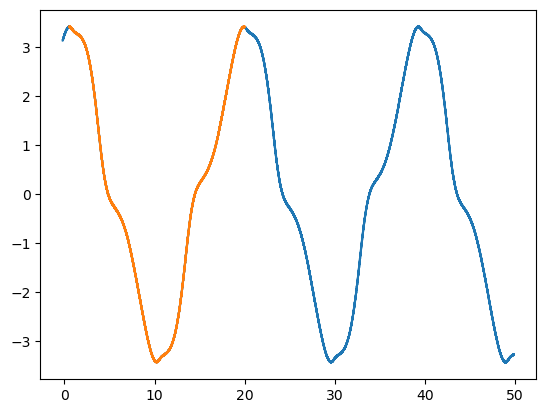

In [31]:
from scipy.integrate import cumulative_trapezoid

fig, ax = plt.subplots()

# ax.plot(set_1['Time'], set_1['Channel C'])
# ax.plot(set_2['Time'], set_2['Channel C'])

time = set_1['Time'].values
amplitude = set_1['Channel C'].values

ax.plot(time, amplitude)

# Step 1: Find local maxima using SciPy's find_peaks function
# Adjust 'height' and 'distance' based on your signal characteristics
peaks, _ = find_peaks(amplitude, height=None, distance=300000)

start_peak=peaks[0]
end_peak=peaks[1]

time_segment = time[start_peak:end_peak + 1]
amplitude_segment = amplitude[start_peak:end_peak + 1]

ax.plot(time_segment, amplitude_segment)

plt.show()


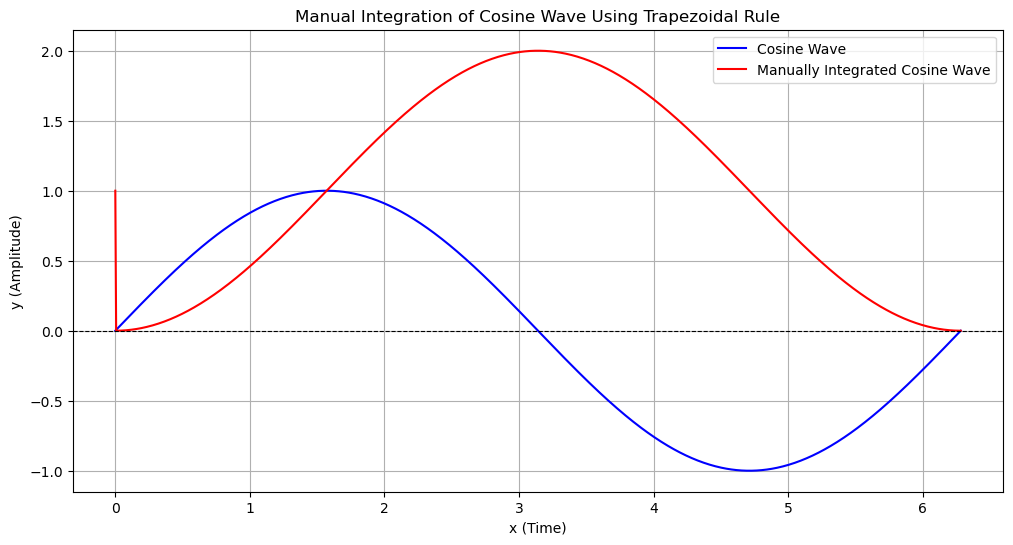

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cosine wave
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Initialize the integrated array with the same length as x
integrated_y = np.zeros_like(x)
integrated_y[0] = 1
integral = 0

# Manual cumulative integration using a for loop
for i in range(1, len(x)):
    dx = x[i] - x[i - 1]
    area = 0.5 * (y[i] + y[i - 1]) * dx
    integral += area
    integrated_y[i] = integral

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Cosine Wave', color='blue')
plt.plot(x, integrated_y, label='Manually Integrated Cosine Wave', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Manual Integration of Cosine Wave Using Trapezoidal Rule')
plt.xlabel('x (Time)')
plt.ylabel('y (Amplitude)')
plt.legend()
plt.grid()
plt.show()
